This assignment is inspired by: 

- https://www.kaggle.com/code/carlmcbrideellis/an-introduction-to-xgboost-regression
- https://www.kaggle.com/code/dansbecker/xgboost/notebook

In this assignment we will apply XGBoost Regression techniques to predict house prices, based on the famous Kaggle Dataset https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

Step 1 is to download the dataset.

In [1]:
#=========================================================================
# load up the libraries
#=========================================================================
import pandas  as pd
import numpy   as np
import xgboost as xgb

#=========================================================================
# read in the data
#=========================================================================
train_data = pd.read_csv('train.csv',index_col=0)
test_data  = pd.read_csv('test.csv',index_col=0)

### <center style="background-color:Gainsboro; width:60%;">Feature selection</center>
The purpose of feature selection, as the name suggests, is to only model the most pertinent and important features, thus reducing the computational overhead, and also to alleviate the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality). The following are a number of notebooks covering techniques to achieve said goal, all of which use the House Prices data as an example:

* [Feature selection using the Boruta-SHAP package](https://www.kaggle.com/carlmcbrideellis/feature-selection-using-the-boruta-shap-package)
* [Recursive Feature Elimination (RFE) example](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example)
* [House Prices: Permutation Importance example](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example)
* [Feature importance using the LASSO](https://www.kaggle.com/carlmcbrideellis/feature-importance-using-the-lasso)

In this assignment, we shall use all of the numerical columns, and ignore the categorical features. To encode the categorical features one can use for example [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 

Our first task is to do Feature Exploration and Selection. 

In [2]:
## Do your work here

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [3]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
nulls = train_data.isna().sum()

In [5]:
nulls

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [7]:
num_col = list(train_data.select_dtypes(exclude=['object']).columns)

In [8]:
train_data = train_data[num_col]

In [10]:
X = train_data.drop('SalePrice',axis=1)
y = train_data['SalePrice']
X = X.fillna(X.mean())

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=12)

In [12]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
# import seaborn as sns
# sns.pairplot(X_train)

In [14]:
# X_train = X_train.fillna(X_train.mean())
# X_test  = X_test.fillna(X_test.mean())

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X, y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Create a DataFrame to display feature importances
feat_import = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feat_import = feat_import.sort_values(by='Importance', ascending=False)
print(feat_import)

          Feature  Importance
2         LotArea    0.056722
15      GrLivArea    0.055098
12       1stFlrSF    0.054207
26     GarageArea    0.052927
10      BsmtUnfSF    0.052513
11    TotalBsmtSF    0.051561
1     LotFrontage    0.049295
24    GarageYrBlt    0.047460
5       YearBuilt    0.046299
34         MoSold    0.043678
8      BsmtFinSF1    0.042879
6    YearRemodAdd    0.042010
28    OpenPorchSF    0.037031
27     WoodDeckSF    0.035502
7      MasVnrArea    0.031964
35         YrSold    0.031555
22   TotRmsAbvGrd    0.028913
13       2ndFlrSF    0.028340
3     OverallQual    0.024660
4     OverallCond    0.024287
0      MSSubClass    0.020531
20   BedroomAbvGr    0.019102
23     Fireplaces    0.016572
9      BsmtFinSF2    0.013686
29  EnclosedPorch    0.013581
25     GarageCars    0.013112
16   BsmtFullBath    0.012658
31    ScreenPorch    0.010472
19       HalfBath    0.010401
18       FullBath    0.009256
33        MiscVal    0.006446
17   BsmtHalfBath    0.005563
30      3S

In [15]:
#too many variables for this to work, probably... for now I guess we'll keep everything..?

### <center style="width:60%;">Feature engineering</center>
As mentioned, one aspect of feature engineering is the creation of new features out of existing features. A simple example would be to create a new feature which is the sum of the number of bathrooms in the house:

In [18]:
for df in (X_train, X_test):
    df["n_bathrooms"] = df["BsmtFullBath"] + (df["BsmtHalfBath"]*0.5) + df["FullBath"] + (df["HalfBath"]*0.5)
    df["area_with_basement"]  = df["GrLivArea"] + df["TotalBsmtSF"]

Your next task is to apply some feature engineering to prepare for using the XGBoost Estimator to predict house prices.

In [21]:
#code goes here
for df in (X_train, X_test):
    df['house_plot_ratio'] = df['area_with_basement']/df['LotArea']
X_train['house_plot_ratio'].describe()

count    1168.000000
mean        0.306908
std         0.177055
min         0.019383
25%         0.212627
50%         0.266577
75%         0.331867
max         1.232877
Name: house_plot_ratio, dtype: float64

For more on this fascinating aspect may I recommend the free on-line book ["*Feature Engineering and Selection: A Practical Approach for Predictive Models*"](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson.
### <center style="width:60%;">XGBoost estimator</center>
Note that for this competition we use the RMSLE evaluation metric, rather than the default metric, which for regression is the RMSE. For more on the peculiarities of the RMSLE see the Appendix below.

In [22]:
#=========================================================================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor=xgb.XGBRegressor(eval_metric='rmsle')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [4, 5,6],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015,.05,.1]}

Can you use grid search to find the optimal hyper parameters?

In [32]:
## put code here
search = GridSearchCV(estimator=regressor,param_grid=param_grid,cv=5,n_jobs=-1)
search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmsle', feature_types=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=Non...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.015], 'max_depth': [4, 5],
                         'n_estimators': [500, 600, 700]})

In [33]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 700}


Now, can you setup a XGBoost Regressor object using your hyperparameters and fit it?

In [34]:
best_xgboost = xgb.XGBRegressor(learning_rate = .015, max_depth = 4, n_estimators = 700,eval_metric='rmsle')

Finally, can you run it on your test set?

In [36]:
best_xgboost.fit(X_train,y_train)
y_pred = best_xgboost.predict(X_test)

In [43]:
y_pred

array([215356.08 , 233907.9  , 180575.45 , 130189.984, 161794.8  ,
       252238.89 , 154951.84 , 198321.83 , 223352.58 , 272840.56 ,
       464298.75 , 211648.6  , 174687.02 , 242461.89 , 253122.03 ,
       260583.   , 282224.72 ,  88289.2  , 140420.78 , 109773.19 ,
       122695.164, 301750.53 , 137231.17 ,  92992.555, 120792.66 ,
       194483.16 , 229662.88 , 154450.72 , 153138.23 , 179268.31 ,
       127329.03 , 146369.4  , 191344.02 , 134293.92 , 123347.664,
        92861.24 , 214490.23 , 199822.67 , 175542.95 , 135698.95 ,
       193290.45 , 170945.78 , 162019.08 , 123801.875, 317957.9  ,
       169807.25 ,  63618.438, 117169.53 , 225221.92 , 220471.27 ,
       144355.45 , 255802.86 ,  86343.89 , 190426.02 , 633818.7  ,
       123843.8  , 135962.23 , 430953.4  , 198443.38 , 317981.2  ,
       302048.06 , 143882.25 , 203810.98 , 192750.27 , 212338.56 ,
       275772.84 , 121383.5  , 278799.72 , 191639.8  , 150934.02 ,
       126654.88 , 290473.   , 120189.23 , 186578.19 , 147508.

In [40]:
from sklearn.metrics import mean_squared_log_error

In [41]:
rmsle = mean_squared_log_error(y_test, y_pred,squared=False)

In [42]:
rmsle

0.14536508636814618

In [51]:
solution = pd.DataFrame(y_pred, columns=[['SalePrice']])

In [52]:
solution

,SalePrice
0,215356.078125
1,233907.906250
2,180575.453125
3,130189.984375
4,161794.796875
...,...
287,137455.656250
288,291202.750000
289,123535.242188
290,146911.593750


In [ ]:
Can you score your solution offline and see how it does?

In [53]:
# read in the ground truth file
# solution   = pd.read_csv(<your solution file>)
y_true     = solution["SalePrice"]

from sklearn.metrics import mean_squared_log_error
RMSLE = np.sqrt( mean_squared_log_error(y_test, y_pred) )
print("The score is %.5f" % RMSLE )

The score is 0.14537


Finally, use the below block to prepare your submission

In [55]:
output = pd.DataFrame({"Id":X_train.index, "SalePrice":y_pred})
output.to_csv('submission.csv', index=False)

ValueError: All arrays must be of the same length

### <center style="background-color:Gainsboro; width:60%;">Feature importance</center>
Let us also take a very quick look at the feature importance too:

NotFittedError: need to call fit or load_model beforehand

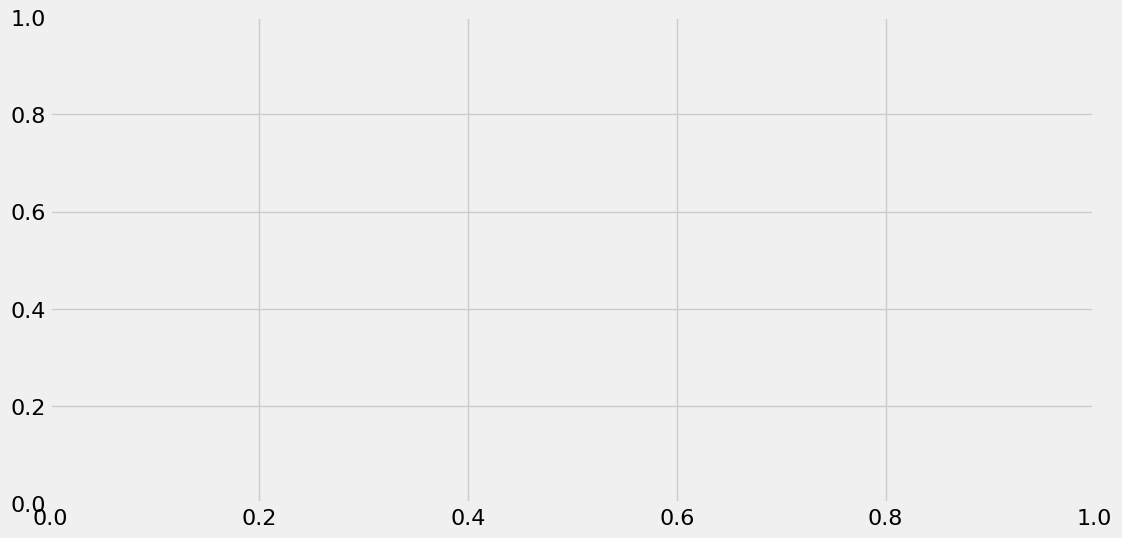

In [56]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(regressor, max_num_features=8, ax=ax)
plt.show();

Where here the `F score` is a measure "*...based on the number of times a variable is selected for splitting, weighted by the squared improvement to the model as a result of each split, and averaged over all trees*." [1] 

Note that these importances are susceptible to small changes in the training data, and it is much better to make use of ["GPU accelerated SHAP values"](https://www.kaggle.com/carlmcbrideellis/gpu-accelerated-shap-values-jane-street-example), incorporated with version 1.3 of XGBoost.

Can you follow the above guide use SHAP values instead of F Score?

In [1]:
# code here

### <center style="background-color:Gainsboro; width:60%;">Appendix: The RMSLE evaluation metric</center>
From the competition [evaluation page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) we see that the metric we are using is the root mean squared logarithmic error (RMSLE), which is given by

$$ {\mathrm {RMSLE}}\,(y, \hat y) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left(\log (1 + \hat{y}_i) - \log (1 + y_i)\right)^2} $$

where $\hat{y}_i$ is the predicted value of the target for instance $i$, and $y_i$
is the actual value of the target for instance $i$.

It is important to note that, unlike the RMSE, the RMSLE is asymmetric; penalizing much more the underestimated predictions than the overestimated predictions. For example, say the correct value is $y_i = 1000$, then underestimating by 600 is almost twice as bad as overestimating by 600:

In [ ]:
def RSLE(y_hat,y):
    return np.sqrt((np.log1p(y_hat) - np.log1p(y))**2)

print("The RMSLE score is %.3f" % RSLE( 400,1000) )
print("The RMSLE score is %.3f" % RSLE(1600,1000) )

The asymmetry arises because 

$$ \log (1 + \hat{y}_i) - \log (1 + y_i) =  \log \left( \frac{1 + \hat{y}_i}{1 + y_i} \right) $$

so we are essentially looking at ratios, rather than differences such as is the case of the RMSE. We can see the form that this asymmetry takes in the following plot, again using 1000 as our ground truth value:

In [ ]:
plt.rcParams["figure.figsize"] = (7, 4)
x = np.linspace(5,4000,100)
plt.plot(x, RSLE(x,1000))
plt.xlabel('prediction')
plt.ylabel('RMSLE')
plt.show()